### Name: Anjum Rohra

## Data Science and Business Analytics

## Task 2: Prediction using Unsupervised ML
This task is implemented using k-means clustering model, where 'k' represents number of clusters. The optimum value of k can be obtained from the elbow graph. It is classified as Unsupervised ML because there are no labels involved (i.e.) there are no dependent and independent variables. This model segregates different types of Iris into different clusters based on their given features (i.e.) Sepal Length, Sepal Width, Petal Length and Petal Width. 

## Importing required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Converting .csv input to dataframe

In [2]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Analyzing all the variables

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Checking datatype of all the columns in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Obtaining the distribution of each Iris species in the dataset 

In [5]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
data.drop(['SepalLengthCm', 'SepalWidthCm', 'Species'],axis='columns',inplace=True)
data.head()

,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2


## The elbow method to find k

In [7]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

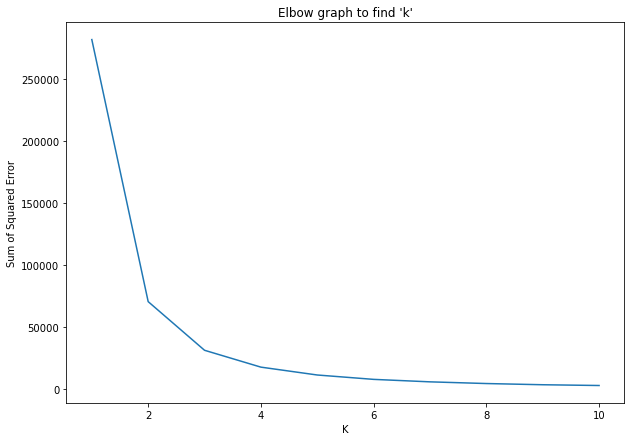

In [8]:
plt.figure(figsize=(10,7))
plt.title("Elbow graph to find 'k'")
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse);

From above graph, optimum value of k can be taken as 3

## Applying k-means algorithm to obtain cluster distribution

In [9]:
km = KMeans(n_clusters=3,max_iter=1000,random_state=57)
km

KMeans(max_iter=1000, n_clusters=3, random_state=57)

In [10]:
y_pred = km.fit_predict(data[["PetalLengthCm","PetalWidthCm"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
data["cluster"] = y_pred
data

,Id,PetalLengthCm,PetalWidthCm,cluster
0,1,1.4,0.2,1
1,2,1.4,0.2,1
2,3,1.3,0.2,1
3,4,1.5,0.2,1
4,5,1.4,0.2,1
...,...,...,...,...
145,146,5.2,2.3,0
146,147,5.0,1.9,0
147,148,5.2,2.0,0
148,149,5.4,2.3,0


In [12]:
data["cluster"].value_counts()

2    52
1    50
0    48
Name: cluster, dtype: int64

## Plotting the clusters and their corresponding centroids

In [13]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [14]:
data1 = data[data["cluster"]==0]  #blue
data2 = data[data["cluster"]==1]  #orange
data3 = data[data["cluster"]==2]  #green

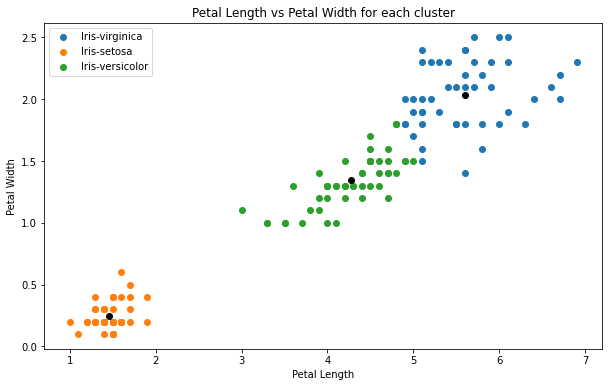

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(data1.PetalLengthCm,data1.PetalWidthCm,label="Iris-virginica")
plt.scatter(data2.PetalLengthCm,data2.PetalWidthCm,label="Iris-setosa")
plt.scatter(data3.PetalLengthCm,data3.PetalWidthCm,label="Iris-versicolor")

#Plotting the centroids for each cluster
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="o")
plt.title("Petal Length vs Petal Width for each cluster")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.legend();

As seen in the scatter plot above, there are 3 clusters formed each for 3 different Iris species:

The biggest among them is "Iris-virginica" and the smallest one is "Iris-setosa"

The black dots at the center of each cluster represents the corresponding cluster centroids